### LPDG Assignment - Bike Traffic Forecasting

### Importing Libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load Data

In [106]:
data_path_rides_day=r"C:\Users\abdul\OneDrive\Desktop\LPDG ASSIGNMENT  BIKE FORECASTING\data\rides_day.csv"
data_path_bikestations=r"C:\Users\abdul\OneDrive\Desktop\LPDG ASSIGNMENT  BIKE FORECASTING\data\bikestations.csv"
data_path_rad_15min=r"C:\Users\abdul\OneDrive\Desktop\LPDG ASSIGNMENT  BIKE FORECASTING\data\rad_15min.csv"

rides_day=pd.read_csv(data_path_rides_day,encoding="unicode_escape")
bikestations=pd.read_csv(data_path_bikestations,encoding="unicode_escape")
rides_15min=pd.read_csv(data_path_rad_15min,encoding="unicode_escape")

### Renaming Data Columns

In [107]:

rename_rides_day_columns = {
    'datum': 'Date', 
    'gesamt': 'Total_Rides_Day', 
    'niederschlag': 'Precipitation', 
    'bewoelkung': 'Cloud_Coverage', 
    'sonnenstunden': 'Sunshine_Hours', 
    'zaehlstelle': 'Station_ID'
}


rides_day.rename(columns=rename_rides_day_columns, inplace=True)


rename_bikestations_columns = {
    'zaehlstelle': 'Station_ID',
    'zaehlstelle_lang': 'Station_Name_Long'

}

bikestations.rename(columns=rename_bikestations_columns, inplace=True)


rename_rides_15min_columns = {
    'datum': 'Date',
    'zaehlstelle': 'Station_ID',
    'gesamt': 'Total_Rides_15min'
}

rides_15min.rename(columns=rename_rides_15min_columns, inplace=True)




### Looking at Data of rides_day.csv

In [108]:
print("Shape of Ridesday\n")
rides_day.shape


Shape of Ridesday



(13146, 12)

In [109]:
print("First 5 rows of Ridesday\n")
rides_day.head()


First 5 rows of Ridesday



Date uhrzeit_start uhrzeit_ende  Station_ID  richtung_1  richtung_2  \
0  2017.01.01         00:00        23:59      Arnulf         121          14   
1  2017.01.01         00:00        23:59     Erhardt         253         278   
2  2017.01.01         00:00        23:59      Hirsch          67          74   
3  2017.01.01         00:00        23:59    Kreuther          14          16   
4  2017.01.01         00:00        23:59  Margareten         197         187   

   Total_Rides_Day  min-temp  max-temp  Precipitation  Cloud_Coverage  \
0              135      -6.1       2.6            0.0              36   
1              531      -6.1       2.6            0.0              36   
2              141      -6.1       2.6            0.0              36   
3               30      -6.1       2.6            0.0              36   
4              384      -6.1       2.6            0.0              36   

   Sunshine_Hours  
0             5.9  
1             5.9  
2             5.9  
3             5.9  
4             5.9

In [110]:
print("Last 5 rows of Ridesday\n")
rides_day.tail()

Last 5 rows of Ridesday



Date uhrzeit_start uhrzeit_ende  Station_ID  richtung_1  \
13141  2022.12.31         00:00        23:59     Erhardt         950   
13142  2022.12.31         00:00        23:59      Hirsch         240   
13143  2022.12.31         00:00        23:59    Kreuther         149   
13144  2022.12.31         00:00        23:59  Margareten         793   
13145  2022.12.31         00:00        23:59     Olympia         609   

       richtung_2  Total_Rides_Day  min-temp  max-temp  Precipitation  \
13141         918             1868      10.5      20.0            0.0   
13142         285              525      10.5      20.0            0.0   
13143         124              273      10.5      20.0            0.0   
13144         774             1567      10.5      20.0            0.0   
13145         493             1102      10.5      20.0            0.0   

       Cloud_Coverage  Sunshine_Hours  
13141              96             2.9  
13142              96             2.9  
13143              96             2.9  
13144              96             2.9  
13145              96             2.9

In [111]:
print("Converting Date to dd/mm/yyyy format")
rides_day["Date"]=pd.to_datetime(rides_day["Date"])

Converting Date to dd/mm/yyyy format


In [112]:
print("Adding new Columns by splitting Day,Month,Year & Week Day ")
rides_day["Day"]=pd.to_datetime(rides_day["Date"]).dt.day
rides_day["Month"]=pd.to_datetime(rides_day["Date"]).dt.month
rides_day["Year"]=pd.to_datetime(rides_day["Date"]).dt.year
rides_day["Week Day"]=pd.to_datetime(rides_day["Date"]).dt.day_name()


Adding new Columns by splitting Day,Month,Year & Week Day 


In [113]:
print("Dropping the Date column as it is not needed")
rides_day.drop("Date",axis=1,inplace=True)

Dropping the Date column as it is not needed


In [114]:
rides_day["Average Temp"]=((rides_day["min-temp"] + rides_day["max-temp"])/2)

In [115]:
print("Complete info of Ridesday\n")
rides_day.info()

Complete info of Ridesday

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uhrzeit_start    13146 non-null  object 
 1   uhrzeit_ende     13146 non-null  object 
 2   Station_ID       13146 non-null  object 
 3   richtung_1       13146 non-null  int64  
 4   richtung_2       13146 non-null  int64  
 5   Total_Rides_Day  13146 non-null  int64  
 6   min-temp         13146 non-null  float64
 7   max-temp         13146 non-null  float64
 8   Precipitation    13146 non-null  float64
 9   Cloud_Coverage   13146 non-null  int64  
 10  Sunshine_Hours   13146 non-null  float64
 11  Day              13146 non-null  int32  
 12  Month            13146 non-null  int32  
 13  Year             13146 non-null  int32  
 14  Week Day         13146 non-null  object 
 15  Average Temp     13146 non-null  float64
dtypes: float64(5), int32(3), int64(

In [116]:
print("Lets look more about rides_day.csv")
rides_day.describe(include="all")

Lets look more about rides_day.csv


uhrzeit_start uhrzeit_ende Station_ID    richtung_1    richtung_2  \
count          13146        13146      13146  13146.000000  13146.000000   
unique             1            1          6           NaN           NaN   
top            00:00        23:59     Arnulf           NaN           NaN   
freq           13146        13146       2191           NaN           NaN   
mean             NaN          NaN        NaN   1063.145291    900.099270   
std              NaN          NaN        NaN    945.422773    930.385164   
min              NaN          NaN        NaN      0.000000      0.000000   
25%              NaN          NaN        NaN    355.000000    144.250000   
50%              NaN          NaN        NaN    823.000000    594.000000   
75%              NaN          NaN        NaN   1502.000000   1355.750000   
max              NaN          NaN        NaN   6152.000000   6131.000000   

        Total_Rides_Day      min-temp      max-temp  Precipitation  \
count      13146.000000  13146.000000  13146.000000   13146.000000   
unique              NaN           NaN           NaN            NaN   
top                 NaN           NaN           NaN            NaN   
freq                NaN           NaN           NaN            NaN   
mean        1963.244561      6.474547     15.574791       2.578754   
std         1828.565104      6.643432      9.042370       5.871403   
min            0.000000    -14.800000     -8.100000       0.000000   
25%          613.250000      1.100000      8.400000       0.000000   
50%         1393.000000      6.400000     15.600000       0.000000   
75%         2714.500000     12.200000     22.900000       2.400000   
max        12283.000000     21.400000     36.800000      71.200000   

        Cloud_Coverage  Sunshine_Hours           Day         Month  \
count     13146.000000    13146.000000  13146.000000  13146.000000   
unique             NaN             NaN           NaN           NaN   
top                NaN             NaN           NaN           NaN   
freq               NaN             NaN           NaN           NaN   
mean         70.403393        5.657904     15.726533      6.523962   
std          29.219167        4.749652      8.799253      3.448551   
min           0.000000        0.000000      1.000000      1.000000   
25%          54.000000        1.000000      8.000000      4.000000   
50%          80.000000        4.900000     16.000000      7.000000   
75%          95.000000        9.800000     23.000000     10.000000   
max         100.000000       15.700000     31.000000     12.000000   

                Year Week Day  Average Temp  
count   13146.000000    13146  13146.000000  
unique           NaN        7           NaN  
top              NaN   Monday           NaN  
freq             NaN     1879           NaN  
mean     2019.500228      NaN     11.024669  
std         1.707534      NaN      7.646698  
min      2017.000000      NaN    -10.400000  
25%      2018.000000      NaN      4.950000  
50%      2020.000000      NaN     11.000000  
75%      2021.000000      NaN     17.400000  
max      2022.000000      NaN     27.550000

In [117]:
print("Checking null values of Rides Day\n")
rides_day.isnull().sum()

Checking null values of Rides Day



uhrzeit_start      0
uhrzeit_ende       0
Station_ID         0
richtung_1         0
richtung_2         0
Total_Rides_Day    0
min-temp           0
max-temp           0
Precipitation      0
Cloud_Coverage     0
Sunshine_Hours     0
Day                0
Month              0
Year               0
Week Day           0
Average Temp       0
dtype: int64

### Looking at Data of bikestations.csv

In [118]:
print("Shape of Bike Stations\n")
bikestations.shape

Shape of Bike Stations



(6, 7)

In [119]:
print("First 5 rows of Bike Stations\n")
bikestations.head()

First 5 rows of Bike Stations



Station_ID                 Station_Name_Long  latitude  longitude  \
0      Arnulf       Arnulfstr. 9 - 11 SÃ¼dseite  48.14205   11.55534   
1    Kreuther                 Bad-Kreuther-Str.  48.12194   11.62417   
2     Olympia  Rudolf-Harbig-Weg (Olympia Park)  48.16887   11.55005   
3      Hirsch      Birketweg HLP (Hirschgarten)  48.14438   11.51794   
4  Margareten           Margaretenstr. (Harras)  48.12032   11.53599   

  richtung_1 richtung_2                                     besonderheiten  
0        Ost       West  nur StadteinwÃ¤rts. Die ZÃ¤hlungen der ZÃ¤hlst...  
1       West        Ost  Im April 2020 wurde die ZÃ¤hlschleife am Josep...  
2       Nord       SÃ¼d                                                NaN  
3       West        Ost                                                NaN  
4       West        Ost                                                NaN

In [120]:
print("Last 5 rows of Bike Stations\n")
bikestations.tail()

Last 5 rows of Bike Stations



Station_ID                 Station_Name_Long  latitude  longitude  \
1    Kreuther                 Bad-Kreuther-Str.  48.12194   11.62417   
2     Olympia  Rudolf-Harbig-Weg (Olympia Park)  48.16887   11.55005   
3      Hirsch      Birketweg HLP (Hirschgarten)  48.14438   11.51794   
4  Margareten           Margaretenstr. (Harras)  48.12032   11.53599   
5     Erhardt    Erhardtstr. (Deutsches Museum)  48.13192   11.58469   

  richtung_1 richtung_2                                     besonderheiten  
1       West        Ost  Im April 2020 wurde die ZÃ¤hlschleife am Josep...  
2       Nord       SÃ¼d                                                NaN  
3       West        Ost                                                NaN  
4       West        Ost                                                NaN  
5       SÃ¼d       Nord  Es wird auf dem Fahrradweg als auch auf dem Fu...

In [121]:
print("Complete info of Bikestations\n")
bikestations.info()

Complete info of Bikestations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station_ID         6 non-null      object 
 1   Station_Name_Long  6 non-null      object 
 2   latitude           6 non-null      float64
 3   longitude          6 non-null      float64
 4   richtung_1         6 non-null      object 
 5   richtung_2         6 non-null      object 
 6   besonderheiten     3 non-null      object 
dtypes: float64(2), object(5)
memory usage: 468.0+ bytes


In [122]:
print("Lets Look More into the Bikestations\n")
bikestations.describe(include="all")

Lets Look More into the Bikestations



Station_ID            Station_Name_Long   latitude  longitude  \
count           6                            6   6.000000   6.000000   
unique          6                            6        NaN        NaN   
top        Arnulf  Arnulfstr. 9 - 11 SÃ¼dseite        NaN        NaN   
freq            1                            1        NaN        NaN   
mean          NaN                          NaN  48.138247  11.561363   
std           NaN                          NaN   0.017984   0.037901   
min           NaN                          NaN  48.120320  11.517940   
25%           NaN                          NaN  48.124435  11.539505   
50%           NaN                          NaN  48.136985  11.552695   
75%           NaN                          NaN  48.143797  11.577352   
max           NaN                          NaN  48.168870  11.624170   

       richtung_1 richtung_2  \
count           6          6   
unique          4          4   
top          West        Ost   
freq            3          3   
mean          NaN        NaN   
std           NaN        NaN   
min           NaN        NaN   
25%           NaN        NaN   
50%           NaN        NaN   
75%           NaN        NaN   
max           NaN        NaN   

                                           besonderheiten  
count                                                   3  
unique                                                  3  
top     nur StadteinwÃ¤rts. Die ZÃ¤hlungen der ZÃ¤hlst...  
freq                                                    1  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Looking at Data of rad_15min.csv

In [123]:
print("Shape of Rides 15 minutes\n")
rides_15min.shape

Shape of Rides 15 minutes



(1255766, 7)

In [124]:
print("First 5 rows of Ride 15min\n")
rides_15min.head()

First 5 rows of Ride 15min



Date uhrzeit_start uhrzeit_ende  Station_ID  richtung_1  richtung_2  \
0  2017.01.01         00:00        00:15      Arnulf           0           0   
1  2017.01.01         00:00        00:15     Erhardt           0           0   
2  2017.01.01         00:00        00:15      Hirsch           0           0   
3  2017.01.01         00:00        00:15    Kreuther           0           0   
4  2017.01.01         00:00        00:15  Margareten           0           0   

   Total_Rides_15min  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [125]:
print("Last 5 rows of Ride 15min\n")
rides_15min.tail()

Last 5 rows of Ride 15min



Date uhrzeit_start uhrzeit_ende  Station_ID  richtung_1  \
1255761  2022.12.31         23:45        00:00     Erhardt           5   
1255762  2022.12.31         23:45        00:00      Hirsch           0   
1255763  2022.12.31         23:45        00:00    Kreuther           0   
1255764  2022.12.31         23:45        00:00  Margareten           0   
1255765  2022.12.31         23:45        00:00     Olympia          12   

         richtung_2  Total_Rides_15min  
1255761           2                  7  
1255762           0                  0  
1255763           0                  0  
1255764           0                  0  
1255765           5                 17

In [126]:
print("Converting Date to dd/mm/yyyy format")
rides_15min["Date"]=pd.to_datetime(rides_15min["Date"])
rides_15min["uhrzeit_start"]=pd.to_datetime(rides_15min["uhrzeit_start"])
rides_15min["uhrzeit_ende"]=pd.to_datetime(rides_15min["uhrzeit_ende"])

Converting Date to dd/mm/yyyy format


C:\Users\abdul\AppData\Local\Temp\ipykernel_26460\2547702457.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rides_15min["uhrzeit_start"]=pd.to_datetime(rides_15min["uhrzeit_start"])
C:\Users\abdul\AppData\Local\Temp\ipykernel_26460\2547702457.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rides_15min["uhrzeit_ende"]=pd.to_datetime(rides_15min["uhrzeit_ende"])


In [127]:
print("Adding new Columns by splitting Day,Month,Year & Week Day ")
rides_15min["Day"]=pd.to_datetime(rides_15min["Date"]).dt.day
rides_15min["Month"]=pd.to_datetime(rides_15min["Date"]).dt.month
rides_15min["Year"]=pd.to_datetime(rides_15min["Date"]).dt.year
rides_15min["Week Day"]=pd.to_datetime(rides_15min["Date"]).dt.day_name()
rides_15min["Starting Hour"]=pd.to_datetime(rides_15min["uhrzeit_start"]).dt.hour
rides_15min["Starting Minutes"]=pd.to_datetime(rides_15min["uhrzeit_start"]).dt.minute
rides_15min["Ending Hour"]=pd.to_datetime(rides_15min["uhrzeit_ende"]).dt.hour
rides_15min["Ending Minutes"]=pd.to_datetime(rides_15min["uhrzeit_ende"]).dt.minute


Adding new Columns by splitting Day,Month,Year & Week Day 


In [128]:
print("Dropping the some columns as they are not needed")
rides_15min.drop("Date",axis=1,inplace=True)
rides_15min.drop("uhrzeit_start",axis=1,inplace=True)
rides_15min.drop("uhrzeit_ende",axis=1,inplace=True)

Dropping the some columns as they are not needed


In [129]:
rides_15min.tail()

Station_ID  richtung_1  richtung_2  Total_Rides_15min  Day  Month  \
1255761     Erhardt           5           2                  7   31     12   
1255762      Hirsch           0           0                  0   31     12   
1255763    Kreuther           0           0                  0   31     12   
1255764  Margareten           0           0                  0   31     12   
1255765     Olympia          12           5                 17   31     12   

         Year  Week Day  Starting Hour  Starting Minutes  Ending Hour  \
1255761  2022  Saturday             23                45            0   
1255762  2022  Saturday             23                45            0   
1255763  2022  Saturday             23                45            0   
1255764  2022  Saturday             23                45            0   
1255765  2022  Saturday             23                45            0   

         Ending Minutes  
1255761               0  
1255762               0  
1255763               0  
1255764               0  
1255765               0

In [130]:
print("Complete info about Ride 15min Data\n")
rides_15min.info()

Complete info about Ride 15min Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255766 entries, 0 to 1255765
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Station_ID         1255766 non-null  object
 1   richtung_1         1255766 non-null  int64 
 2   richtung_2         1255766 non-null  int64 
 3   Total_Rides_15min  1255766 non-null  int64 
 4   Day                1255766 non-null  int32 
 5   Month              1255766 non-null  int32 
 6   Year               1255766 non-null  int32 
 7   Week Day           1255766 non-null  object
 8   Starting Hour      1255766 non-null  int32 
 9   Starting Minutes   1255766 non-null  int32 
 10  Ending Hour        1255766 non-null  int32 
 11  Ending Minutes     1255766 non-null  int32 
dtypes: int32(7), int64(3), object(2)
memory usage: 81.4+ MB


In [131]:
print("Lets Look more into the Rides 15min\n")
rides_15min.describe(include="all")

Lets Look more into the Rides 15min



Station_ID    richtung_1    richtung_2  Total_Rides_15min  \
count      1255766  1.255766e+06  1.255766e+06       1.255766e+06   
unique           6           NaN           NaN                NaN   
top     Margareten           NaN           NaN                NaN   
freq        210336           NaN           NaN                NaN   
mean           NaN  1.112080e+01  9.421575e+00       2.054238e+01   
std            NaN  1.699101e+01  1.626586e+01       3.060087e+01   
min            NaN -1.000000e+00 -1.000000e+00      -2.000000e+00   
25%            NaN  0.000000e+00  0.000000e+00       1.000000e+00   
50%            NaN  4.000000e+00  2.000000e+00       8.000000e+00   
75%            NaN  1.500000e+01  1.100000e+01       2.700000e+01   
max            NaN  1.126000e+03  3.270000e+02       1.157000e+03   

                 Day         Month          Year  Week Day  Starting Hour  \
count   1.255766e+06  1.255766e+06  1.255766e+06   1255766   1.255766e+06   
unique           NaN           NaN           NaN         7            NaN   
top              NaN           NaN           NaN  Thursday            NaN   
freq             NaN           NaN           NaN    179519            NaN   
mean    1.573053e+01  6.524195e+00  2.019503e+03       NaN   1.149994e+01   
std     8.797064e+00  3.456810e+00  1.711344e+00       NaN   6.922169e+00   
min     1.000000e+00  1.000000e+00  2.017000e+03       NaN   0.000000e+00   
25%     8.000000e+00  4.000000e+00  2.018000e+03       NaN   5.000000e+00   
50%     1.600000e+01  7.000000e+00  2.020000e+03       NaN   1.100000e+01   
75%     2.300000e+01  1.000000e+01  2.021000e+03       NaN   1.700000e+01   
max     3.100000e+01  1.200000e+01  2.022000e+03       NaN   2.300000e+01   

        Starting Minutes   Ending Hour  Ending Minutes  
count       1.255766e+06  1.255766e+06    1.255766e+06  
unique               NaN           NaN             NaN  
top                  NaN           NaN             NaN  
freq                 NaN           NaN             NaN  
mean        2.250013e+01  1.149994e+01    2.250001e+01  
std         1.677054e+01  6.922167e+00    1.677053e+01  
min         0.000000e+00  0.000000e+00    0.000000e+00  
25%         1.500000e+01  5.000000e+00    3.750000e+00  
50%         3.000000e+01  1.100000e+01    3.000000e+01  
75%         4.500000e+01  1.700000e+01    4.125000e+01  
max         5.900000e+01  2.300000e+01    4.500000e+01

### EXPLORATORY DATA ANALYSIS

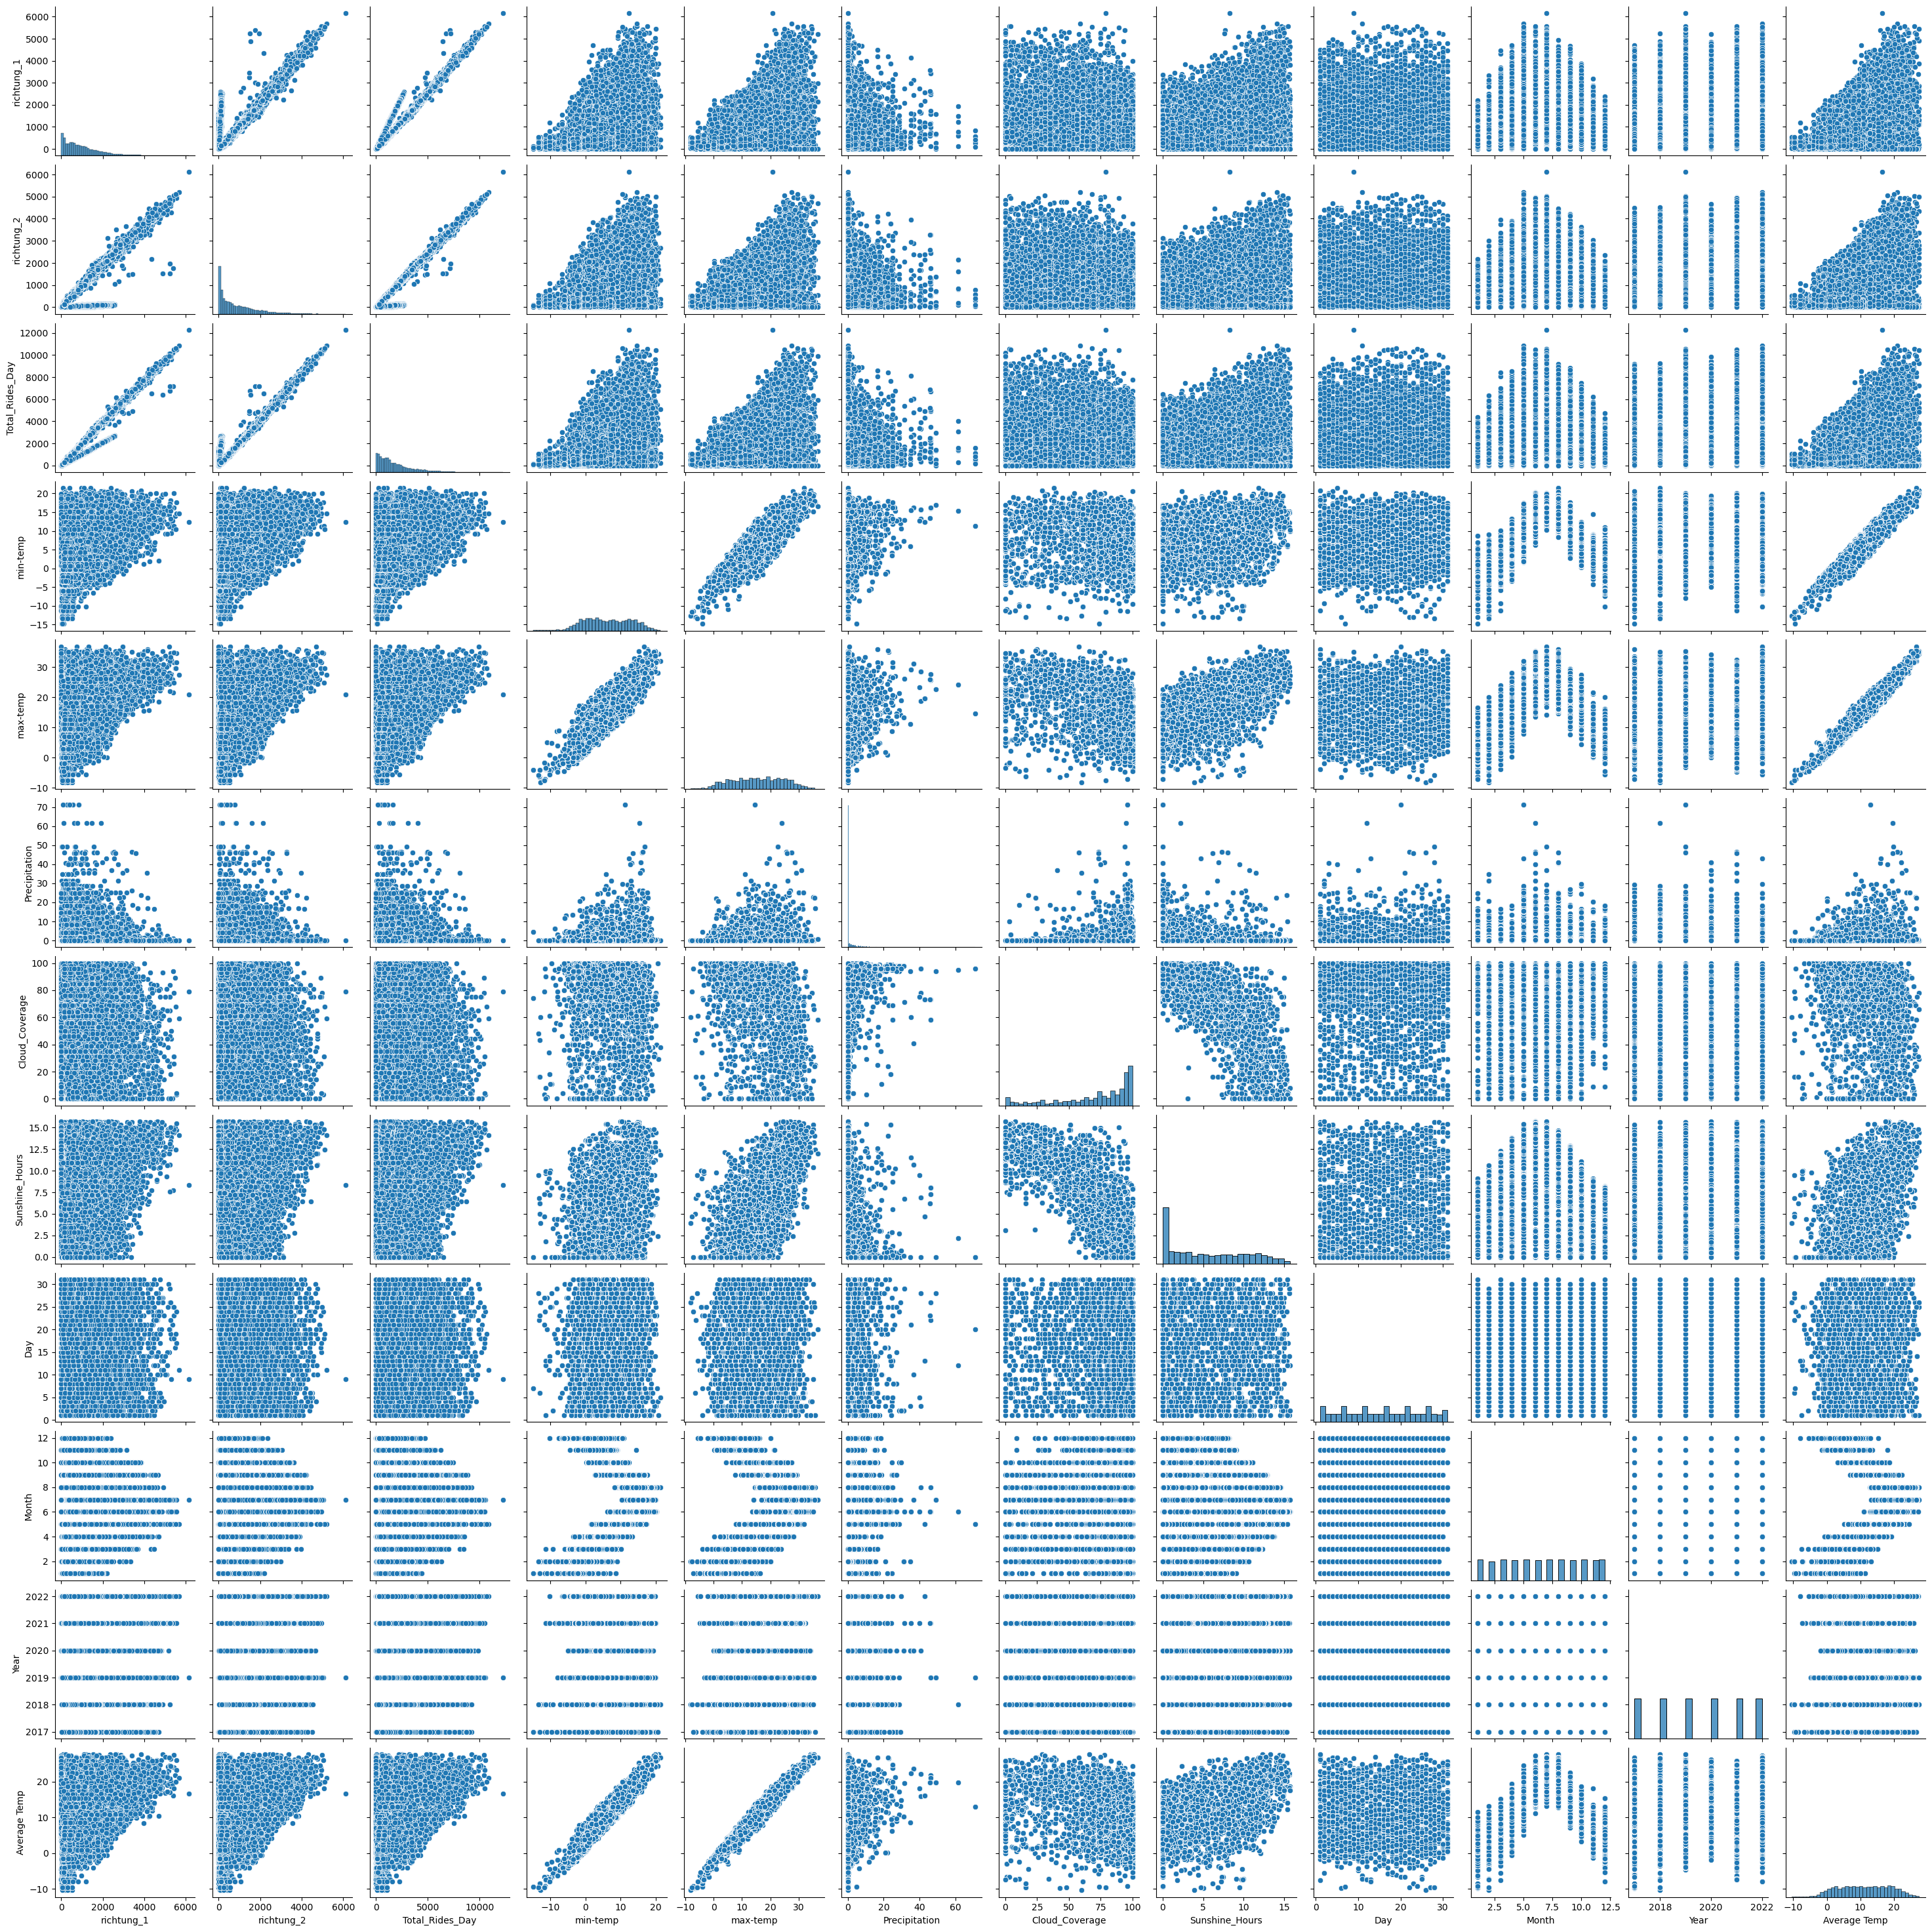

In [132]:
sns.pairplot(rides_day)

<Axes: xlabel='Month', ylabel='Total_Rides_Day'>

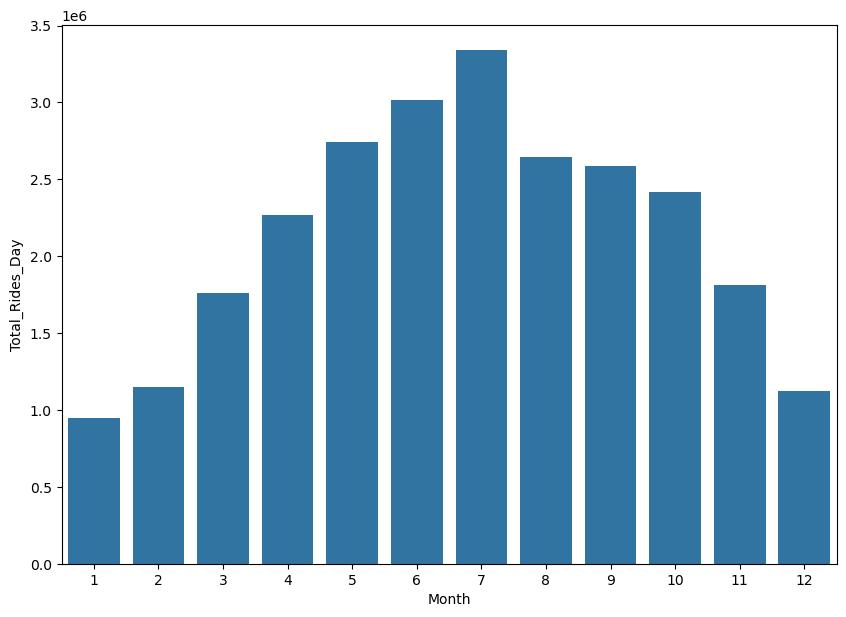

In [133]:
# MONTH VS TOTAL RIDES

plt.figure(figsize=(10,7))
Month = rides_day.groupby("Month").sum().reset_index()
sns.barplot(x="Month",y="Total_Rides_Day",data=Month)

<Axes: xlabel='Day', ylabel='Total_Rides_Day'>

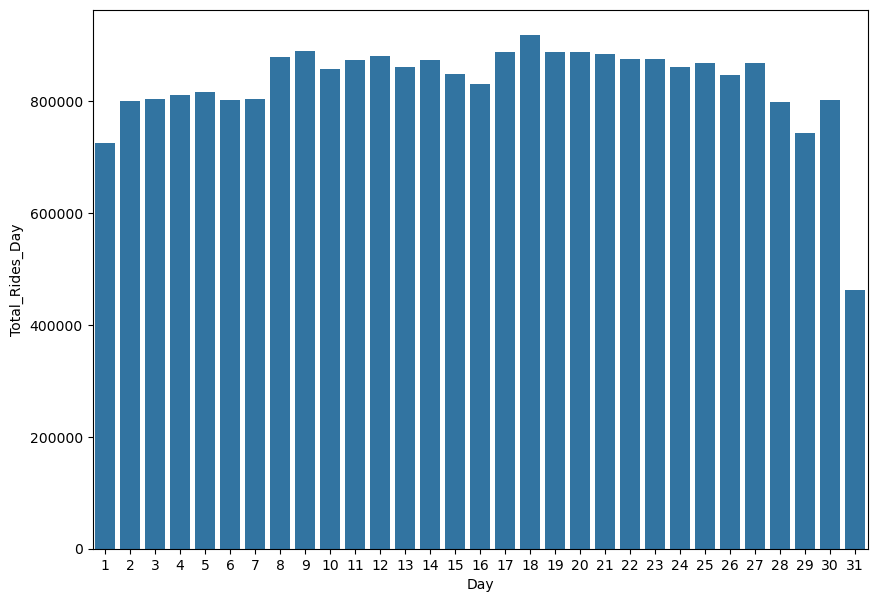

In [31]:
# DAY VS TOTAL RIDES

plt.figure(figsize=(10,7))
Day = rides_day.groupby("Day").sum().reset_index()
sns.barplot(x="Day",y="Total_Rides_Day",data=Day)

<Axes: xlabel='Starting Hour', ylabel='Total_Rides_15min'>

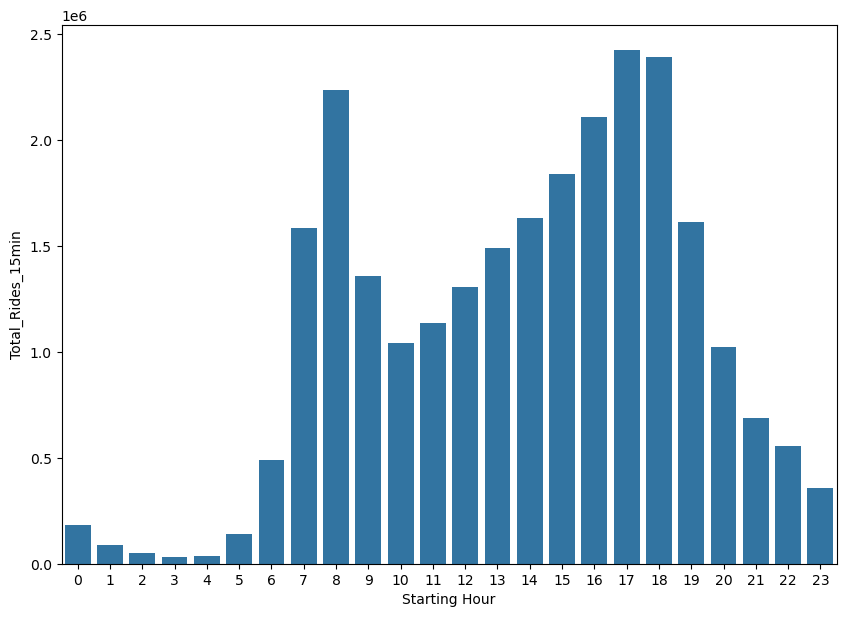

In [134]:
# HOUR VS TOTAL RIDES

plt.figure(figsize=(10,7))
Starting_Hour = rides_15min.groupby("Starting Hour").sum().reset_index()
sns.barplot(x="Starting Hour",y="Total_Rides_15min",data=Starting_Hour)

<Axes: xlabel='Week Day', ylabel='Total_Rides_Day'>

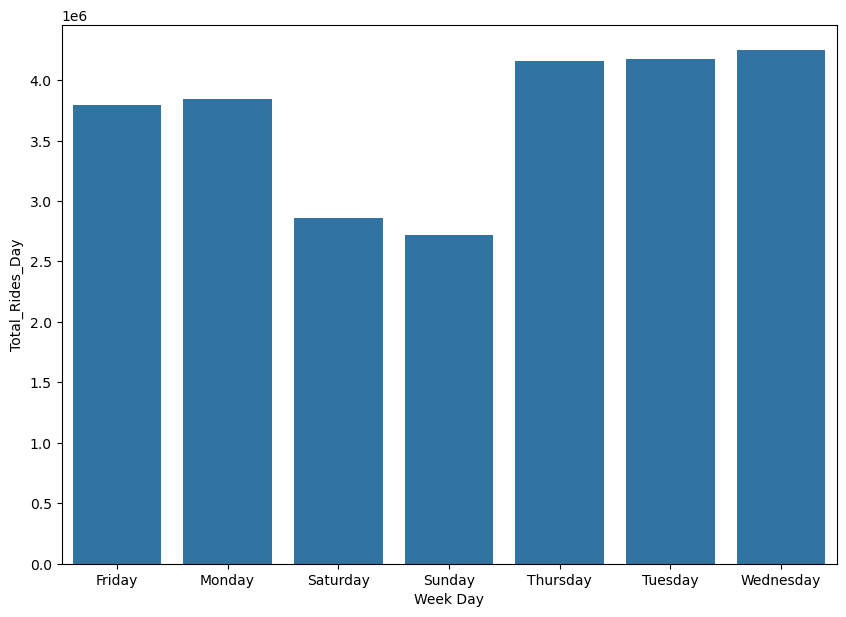

In [135]:
# HOUR VS WEEK DAY

plt.figure(figsize=(10,7))
Week_Day = rides_day.groupby("Week Day").sum().reset_index()
sns.barplot(x="Week Day",y="Total_Rides_Day",data=Week_Day)

<Axes: xlabel='Cloud_Coverage', ylabel='Total_Rides_Day'>

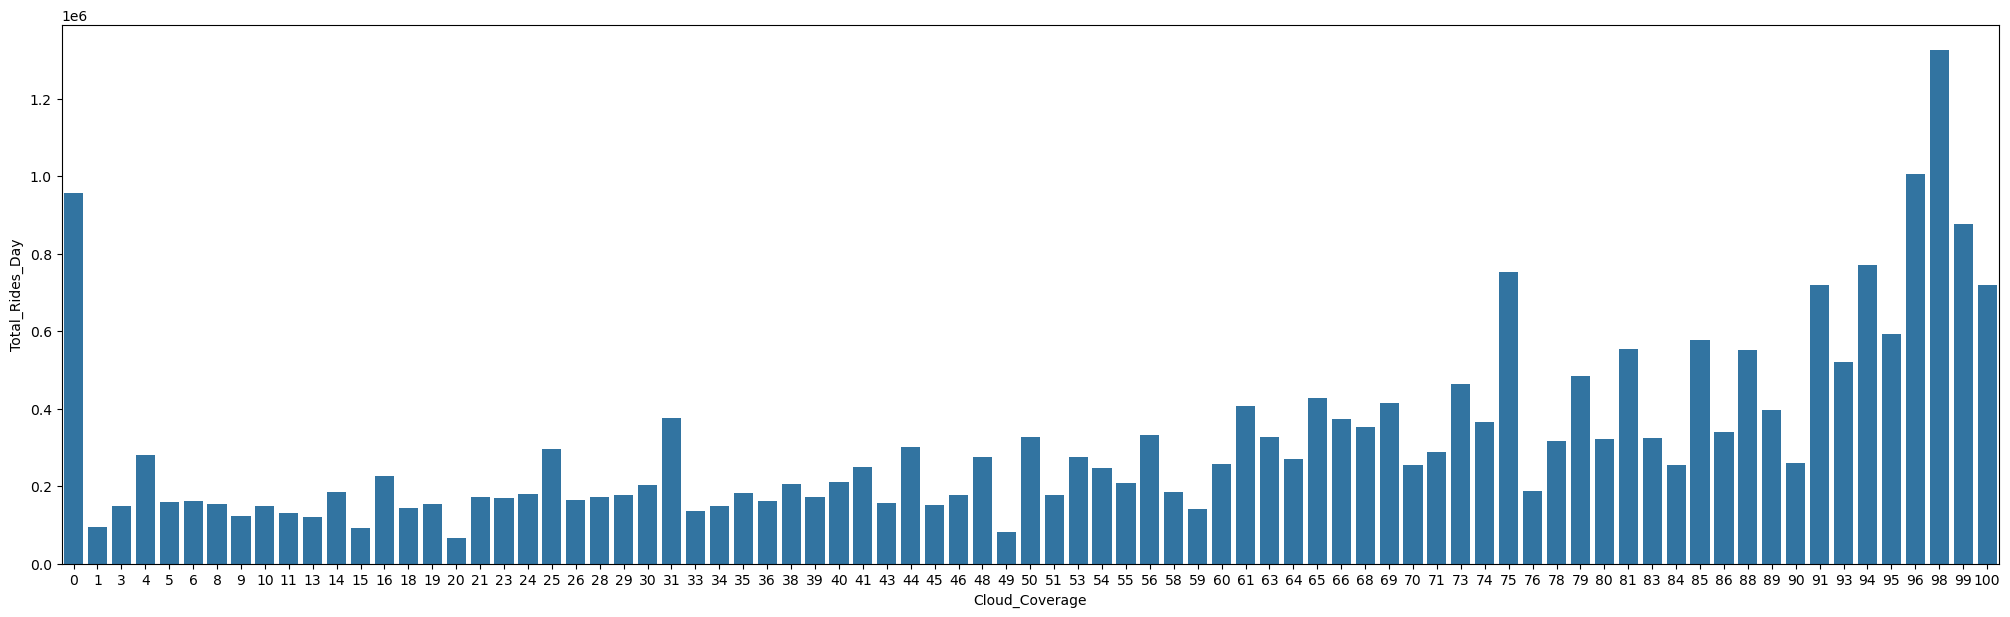

In [136]:
# CLOUD COVERAGE VS TOTAL RIDES

plt.figure(figsize=(25,7))
Cloud_Coverage = rides_day.groupby("Cloud_Coverage").sum().reset_index()
sns.barplot(x="Cloud_Coverage",y="Total_Rides_Day",data=Cloud_Coverage)

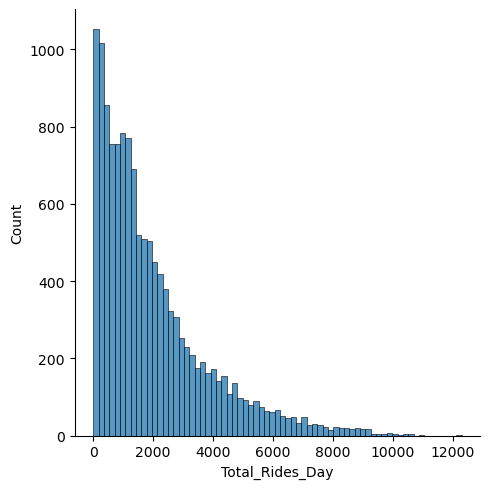

In [139]:
# TOTAL RIDES DISPLOT

sns.displot(rides_day["Total_Rides_Day"])

### Data Preparation

In [140]:
# SKEWED DATA FOR RIDES_DAY

rides_day.select_dtypes(include='number').skew().sort_values(ascending=True)

Cloud_Coverage    -0.990547
min-temp          -0.094057
Average Temp      -0.081868
max-temp          -0.072472
Month             -0.009682
Year              -0.000390
Day                0.006990
Sunshine_Hours     0.346909
richtung_2         1.389792
richtung_1         1.422917
Total_Rides_Day    1.519528
Precipitation      4.238363
dtype: float64

In [141]:
# SKEWED DATA FOR RIDES_15MIN

rides_15min.select_dtypes(include='number').skew().sort_values(ascending=True)

Month               -0.009858
Year                -0.004636
Ending Minutes      -0.000002
Starting Minutes     0.000001
Ending Hour          0.000005
Starting Hour        0.000007
Day                  0.006722
Total_Rides_15min    2.716788
richtung_2           3.167635
richtung_1           3.278978
dtype: float64

<Axes: >

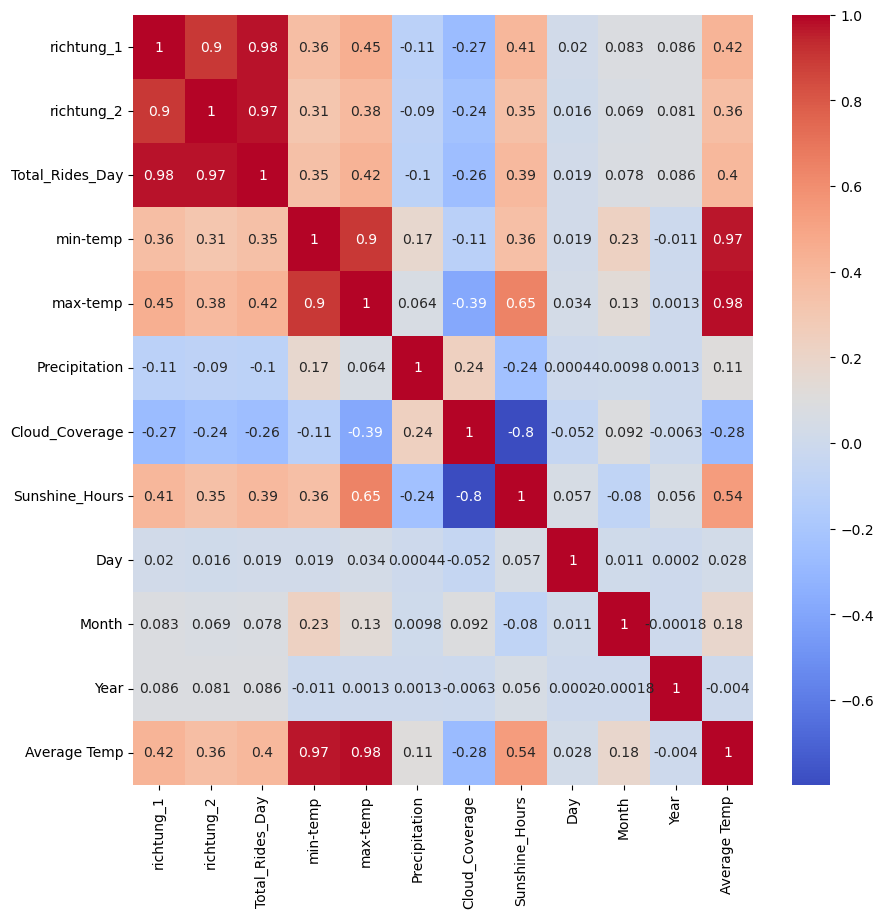

In [142]:
# REMOVE MULTICOLLINEARITY

plt.figure(figsize=(10,10))
sns.heatmap(rides_day.select_dtypes(include=['number']).corr(),annot=True,cmap="coolwarm")

In [143]:
def get_vif(rides_day):
    vif=pd.DataFrame()
    vif["variables"]=rides_day.columns
    vif["VIF"]=[ variance_inflation_factor(rides_day.values,i) for i in range(rides_day.shape[1])]
    return vif

In [144]:
not_for_vif=["Day","Month","Year","Total_Rides_Day"]
get_vif(rides_day[[i for i in rides_day.describe().columns if i not in not_for_vif]])

C:\Users\abdul\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


variables        VIF
0      richtung_1  12.981055
1      richtung_2  10.274389
2        min-temp        inf
3        max-temp        inf
4   Precipitation   1.388282
5  Cloud_Coverage   3.703508
6  Sunshine_Hours  10.621512
7    Average Temp        inf

In [145]:
# ENCODING

rides_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uhrzeit_start    13146 non-null  object 
 1   uhrzeit_ende     13146 non-null  object 
 2   Station_ID       13146 non-null  object 
 3   richtung_1       13146 non-null  int64  
 4   richtung_2       13146 non-null  int64  
 5   Total_Rides_Day  13146 non-null  int64  
 6   min-temp         13146 non-null  float64
 7   max-temp         13146 non-null  float64
 8   Precipitation    13146 non-null  float64
 9   Cloud_Coverage   13146 non-null  int64  
 10  Sunshine_Hours   13146 non-null  float64
 11  Day              13146 non-null  int32  
 12  Month            13146 non-null  int32  
 13  Year             13146 non-null  int32  
 14  Week Day         13146 non-null  object 
 15  Average Temp     13146 non-null  float64
dtypes: float64(5), int32(3), int64(4), object(4)
memory usage:

In [146]:
rides_day["Week Day"].value_counts()

Week Day
Monday       1879
Sunday       1878
Wednesday    1878
Thursday     1878
Friday       1878
Saturday     1878
Tuesday      1877
Name: count, dtype: int64

In [147]:
rides_day["Station_ID"].value_counts()

Station_ID
Arnulf        2191
Erhardt       2191
Hirsch        2191
Kreuther      2191
Margareten    2191
Olympia       2191
Name: count, dtype: int64

In [148]:
rides_15min["Station_ID"].value_counts()

Station_ID
Margareten    210336
Hirsch        210334
Erhardt       210332
Olympia       210332
Kreuther      209952
Arnulf        204480
Name: count, dtype: int64

In [149]:
rides_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uhrzeit_start    13146 non-null  object 
 1   uhrzeit_ende     13146 non-null  object 
 2   Station_ID       13146 non-null  object 
 3   richtung_1       13146 non-null  int64  
 4   richtung_2       13146 non-null  int64  
 5   Total_Rides_Day  13146 non-null  int64  
 6   min-temp         13146 non-null  float64
 7   max-temp         13146 non-null  float64
 8   Precipitation    13146 non-null  float64
 9   Cloud_Coverage   13146 non-null  int64  
 10  Sunshine_Hours   13146 non-null  float64
 11  Day              13146 non-null  int32  
 12  Month            13146 non-null  int32  
 13  Year             13146 non-null  int32  
 14  Week Day         13146 non-null  object 
 15  Average Temp     13146 non-null  float64
dtypes: float64(5), int32(3), int64(4), object(4)
memory usage:

In [150]:
rides_15min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255766 entries, 0 to 1255765
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Station_ID         1255766 non-null  object
 1   richtung_1         1255766 non-null  int64 
 2   richtung_2         1255766 non-null  int64 
 3   Total_Rides_15min  1255766 non-null  int64 
 4   Day                1255766 non-null  int32 
 5   Month              1255766 non-null  int32 
 6   Year               1255766 non-null  int32 
 7   Week Day           1255766 non-null  object
 8   Starting Hour      1255766 non-null  int32 
 9   Starting Minutes   1255766 non-null  int32 
 10  Ending Hour        1255766 non-null  int32 
 11  Ending Minutes     1255766 non-null  int32 
dtypes: int32(7), int64(3), object(2)
memory usage: 81.4+ MB


In [151]:
rides_day_weekday=pd.get_dummies(rides_day["Week Day"],drop_first=True)
rides_15min_weekday=pd.get_dummies(rides_15min["Week Day"],drop_first=True)
rides_day_stationsId=pd.get_dummies(rides_day["Station_ID"],drop_first=True)
rides_15min_stationsId=pd.get_dummies(rides_15min["Station_ID"],drop_first=True)

In [152]:
rides_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uhrzeit_start    13146 non-null  object 
 1   uhrzeit_ende     13146 non-null  object 
 2   Station_ID       13146 non-null  object 
 3   richtung_1       13146 non-null  int64  
 4   richtung_2       13146 non-null  int64  
 5   Total_Rides_Day  13146 non-null  int64  
 6   min-temp         13146 non-null  float64
 7   max-temp         13146 non-null  float64
 8   Precipitation    13146 non-null  float64
 9   Cloud_Coverage   13146 non-null  int64  
 10  Sunshine_Hours   13146 non-null  float64
 11  Day              13146 non-null  int32  
 12  Month            13146 non-null  int32  
 13  Year             13146 non-null  int32  
 14  Week Day         13146 non-null  object 
 15  Average Temp     13146 non-null  float64
dtypes: float64(5), int32(3), int64(4), object(4)
memory usage:

In [153]:
rides_day=pd.concat([rides_day,rides_day_weekday,rides_day_stationsId],axis=1)
rides_15min=pd.concat([rides_15min,rides_15min_weekday,rides_15min_stationsId],axis=1)

In [154]:
rides_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uhrzeit_start    13146 non-null  object 
 1   uhrzeit_ende     13146 non-null  object 
 2   Station_ID       13146 non-null  object 
 3   richtung_1       13146 non-null  int64  
 4   richtung_2       13146 non-null  int64  
 5   Total_Rides_Day  13146 non-null  int64  
 6   min-temp         13146 non-null  float64
 7   max-temp         13146 non-null  float64
 8   Precipitation    13146 non-null  float64
 9   Cloud_Coverage   13146 non-null  int64  
 10  Sunshine_Hours   13146 non-null  float64
 11  Day              13146 non-null  int32  
 12  Month            13146 non-null  int32  
 13  Year             13146 non-null  int32  
 14  Week Day         13146 non-null  object 
 15  Average Temp     13146 non-null  float64
 16  Monday           13146 non-null  bool   
 17  Saturday    

In [54]:
rides_15min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255766 entries, 0 to 1255765
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Station_ID         1255766 non-null  object
 1   richtung_1         1255766 non-null  int64 
 2   richtung_2         1255766 non-null  int64 
 3   Total_Rides_15min  1255766 non-null  int64 
 4   Day                1255766 non-null  int32 
 5   Month              1255766 non-null  int32 
 6   Year               1255766 non-null  int32 
 7   Week Day           1255766 non-null  object
 8   Starting Hour      1255766 non-null  int32 
 9   Starting Minutes   1255766 non-null  int32 
 10  Ending Hour        1255766 non-null  int32 
 11  Ending Minutes     1255766 non-null  int32 
 12  Monday             1255766 non-null  bool  
 13  Saturday           1255766 non-null  bool  
 14  Sunday             1255766 non-null  bool  
 15  Thursday           1255766 non-null  bool  
 16  

In [155]:
rides_day.drop(["Station_ID","Week Day","uhrzeit_start","uhrzeit_ende"],axis=1,inplace=True)
rides_15min.drop(["Station_ID","Week Day"],axis=1,inplace=True)

In [156]:
# RIDES DAY AFTER REMOVING ALL CATEGORICAL VALUES
rides_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   richtung_1       13146 non-null  int64  
 1   richtung_2       13146 non-null  int64  
 2   Total_Rides_Day  13146 non-null  int64  
 3   min-temp         13146 non-null  float64
 4   max-temp         13146 non-null  float64
 5   Precipitation    13146 non-null  float64
 6   Cloud_Coverage   13146 non-null  int64  
 7   Sunshine_Hours   13146 non-null  float64
 8   Day              13146 non-null  int32  
 9   Month            13146 non-null  int32  
 10  Year             13146 non-null  int32  
 11  Average Temp     13146 non-null  float64
 12  Monday           13146 non-null  bool   
 13  Saturday         13146 non-null  bool   
 14  Sunday           13146 non-null  bool   
 15  Thursday         13146 non-null  bool   
 16  Tuesday          13146 non-null  bool   
 17  Wednesday   

In [157]:
# RIDES 15MIN AFTER REMOVING ALL CATEGORICAL VALUES

rides_15min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255766 entries, 0 to 1255765
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   richtung_1         1255766 non-null  int64
 1   richtung_2         1255766 non-null  int64
 2   Total_Rides_15min  1255766 non-null  int64
 3   Day                1255766 non-null  int32
 4   Month              1255766 non-null  int32
 5   Year               1255766 non-null  int32
 6   Starting Hour      1255766 non-null  int32
 7   Starting Minutes   1255766 non-null  int32
 8   Ending Hour        1255766 non-null  int32
 9   Ending Minutes     1255766 non-null  int32
 10  Monday             1255766 non-null  bool 
 11  Saturday           1255766 non-null  bool 
 12  Sunday             1255766 non-null  bool 
 13  Thursday           1255766 non-null  bool 
 14  Tuesday            1255766 non-null  bool 
 15  Wednesday          1255766 non-null  bool 
 16  Erhardt           

In [158]:
rides_day.drop(["richtung_1","richtung_2","max-temp","min-temp"],axis=1,inplace=True)
rides_15min.drop(["richtung_1","richtung_2"],axis=1,inplace=True)

In [59]:
rides_day.drop(["Precipitation"],axis=1,inplace=True)

In [159]:
rides_day.shape

(13146, 19)

In [160]:
rides_15min.shape

(1255766, 19)

In [161]:
rides_day.head()

Total_Rides_Day  Precipitation  Cloud_Coverage  Sunshine_Hours  Day  Month  \
0              135            0.0              36             5.9    1      1   
1              531            0.0              36             5.9    1      1   
2              141            0.0              36             5.9    1      1   
3               30            0.0              36             5.9    1      1   
4              384            0.0              36             5.9    1      1   

   Year  Average Temp  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
0  2017         -1.75   False     False    True     False    False      False   
1  2017         -1.75   False     False    True     False    False      False   
2  2017         -1.75   False     False    True     False    False      False   
3  2017         -1.75   False     False    True     False    False      False   
4  2017         -1.75   False     False    True     False    False      False   

   Erhardt  Hirsch  Kreuther  Margareten  Olympia  
0    False   False     False       False    False  
1     True   False     False       False    False  
2    False    True     False       False    False  
3    False   False      True       False    False  
4    False   False     False        True    False

In [162]:
rides_day.tail()

Total_Rides_Day  Precipitation  Cloud_Coverage  Sunshine_Hours  Day  \
13141             1868            0.0              96             2.9   31   
13142              525            0.0              96             2.9   31   
13143              273            0.0              96             2.9   31   
13144             1567            0.0              96             2.9   31   
13145             1102            0.0              96             2.9   31   

       Month  Year  Average Temp  Monday  Saturday  Sunday  Thursday  Tuesday  \
13141     12  2022         15.25   False      True   False     False    False   
13142     12  2022         15.25   False      True   False     False    False   
13143     12  2022         15.25   False      True   False     False    False   
13144     12  2022         15.25   False      True   False     False    False   
13145     12  2022         15.25   False      True   False     False    False   

       Wednesday  Erhardt  Hirsch  Kreuther  Margareten  Olympia  
13141      False     True   False     False       False    False  
13142      False    False    True     False       False    False  
13143      False    False   False      True       False    False  
13144      False    False   False     False        True    False  
13145      False    False   False     False       False     True

In [163]:
rides_15min.head()

Total_Rides_15min  Day  Month  Year  Starting Hour  Starting Minutes  \
0                  0    1      1  2017              0                 0   
1                  0    1      1  2017              0                 0   
2                  0    1      1  2017              0                 0   
3                  0    1      1  2017              0                 0   
4                  0    1      1  2017              0                 0   

   Ending Hour  Ending Minutes  Monday  Saturday  Sunday  Thursday  Tuesday  \
0            0              15   False     False    True     False    False   
1            0              15   False     False    True     False    False   
2            0              15   False     False    True     False    False   
3            0              15   False     False    True     False    False   
4            0              15   False     False    True     False    False   

   Wednesday  Erhardt  Hirsch  Kreuther  Margareten  Olympia  
0      False    False   False     False       False    False  
1      False     True   False     False       False    False  
2      False    False    True     False       False    False  
3      False    False   False      True       False    False  
4      False    False   False     False        True    False

In [164]:
rides_15min.tail()

Total_Rides_15min  Day  Month  Year  Starting Hour  Starting Minutes  \
1255761                  7   31     12  2022             23                45   
1255762                  0   31     12  2022             23                45   
1255763                  0   31     12  2022             23                45   
1255764                  0   31     12  2022             23                45   
1255765                 17   31     12  2022             23                45   

         Ending Hour  Ending Minutes  Monday  Saturday  Sunday  Thursday  \
1255761            0               0   False      True   False     False   
1255762            0               0   False      True   False     False   
1255763            0               0   False      True   False     False   
1255764            0               0   False      True   False     False   
1255765            0               0   False      True   False     False   

         Tuesday  Wednesday  Erhardt  Hirsch  Kreuther  Margareten  Olympia  
1255761    False      False     True   False     False       False    False  
1255762    False      False    False    True     False       False    False  
1255763    False      False    False   False      True       False    False  
1255764    False      False    False   False     False        True    False  
1255765    False      False    False   False     False       False     True

### Splitting Data for Training & Testing for Rides Day

In [165]:
# Convert boolean columns to integers BEFORE splitting
x = rides_day.drop("Total_Rides_Day", axis=1)
x = x.astype({col: int for col in x.select_dtypes('bool').columns})
y = rides_day["Total_Rides_Day"]

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2025)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (10516, 18)
Shape of X_test:  (2630, 18)
Shape of Y_train:  (10516,)
Shape of Y_test:  (2630,)


In [166]:
# SCALING

sc= StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test=sc.transform(X_test)


In [167]:
X_train[:2]

array([[-0.15161336,  0.87438361, -0.76737158,  0.36626378, -1.31486447,
         0.88331324, -0.36443516, -0.40788589, -0.40295691, -0.40613987,
        -0.40994523, -0.41136836, -0.40725135,  2.23811145, -0.45108653,
        -0.44481291, -0.44818286, -0.44634576],
       [-0.43646223,  0.60094006,  0.37124027, -0.08777723, -1.31486447,
         0.29777857, -0.6065461 , -0.40788589,  2.48165495, -0.40613987,
        -0.40994523, -0.41136836, -0.40725135,  2.23811145, -0.45108653,
        -0.44481291, -0.44818286, -0.44634576]])

In [168]:
sc.mean_

array([2.60484024e+00, 7.04186002e+01, 5.63934956e+00, 1.57732978e+01,
       6.54488399e+00, 2.01949144e+03, 1.09846948e+01, 1.42639787e-01,
       1.39691898e-01, 1.41593762e-01, 1.43875998e-01, 1.44731837e-01,
       1.42259414e-01, 1.66413085e-01, 1.69075694e-01, 1.65176873e-01,
       1.67268924e-01, 1.66127805e-01])

In [169]:
sc.scale_

array([ 5.96807711, 29.25649499,  4.7426171 ,  8.80977675,  3.45654179,
        1.7078408 ,  7.64112529,  0.34970513,  0.34666709,  0.348633  ,
        0.35096395,  0.35183026,  0.34931601,  0.37245103,  0.37481876,
        0.37134011,  0.3732158 ,  0.37219532])

### Splitting Data for Training & Testing for RIDE 15min

In [171]:
# Convert boolean columns to integers BEFORE splitting
# Ensure x1 is a DataFrame before splitting
x1 = rides_15min.drop("Total_Rides_15min", axis=1)
x1 = x1.astype({col: int for col in x1.select_dtypes('bool').columns})
y1 = rides_15min["Total_Rides_15min"]

# Split the data
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, y1, test_size=0.2, random_state=2025)

print("Shape of X1_train: ", X1_train.shape)
print("Shape of X1_test: ", X1_test.shape)
print("Shape of Y1_train: ", Y1_train.shape)
print("Shape of Y1_test: ", Y1_test.shape)


Shape of X1_train:  (1004612, 18)
Shape of X1_test:  (251154, 18)
Shape of Y1_train:  (1004612,)
Shape of Y1_test:  (251154,)


In [172]:
# SCALING

sc= StandardScaler()
sc.fit(X1_train)

X1_train = sc.transform(X1_train)
X1_test=sc.transform(X1_test)

In [173]:
X1_train[:2]

array([[-1.10619217, -1.59794512,  1.46006239,  0.65076242,  1.34210039,
         0.79516112, -1.34197508, -0.4079728 , -0.40833789, -0.40758431,
         2.44732163, -0.40821842, -0.40854195, -0.44868663,  2.22941904,
        -0.44805255, -0.44872185, -0.44870744],
       [ 0.82564845,  1.58386546, -0.29293451, -0.07147778, -1.34111169,
        -0.0715901 , -0.44743247,  2.45114382, -0.40833789, -0.40758431,
        -0.40860996, -0.40821842, -0.40854195, -0.44868663,  2.22941904,
        -0.44805255, -0.44872185, -0.44870744]])

In [174]:
sc.mean_

array([1.57343780e+01, 6.52433775e+00, 2.01950131e+03, 1.14948338e+01,
       2.24917092e+01, 1.14955754e+01, 2.25027025e+01, 1.42691905e-01,
       1.42910895e-01, 1.42458979e-01, 1.43074142e-01, 1.42839225e-01,
       1.43033330e-01, 1.67582111e-01, 1.67495511e-01, 1.67187929e-01,
       1.67604010e-01, 1.67595052e-01])

In [175]:
sc.scale_

array([ 8.79989782,  3.45715111,  1.711355  ,  6.92290464, 16.77094415,
        6.9224016 , 16.76834599,  0.34975838,  0.34998196,  0.34952027,
        0.35014844,  0.34990882,  0.35010684,  0.37349478,  0.37341768,
        0.37314357,  0.37351426,  0.37350629])

### Training ML Model & Evaluation - XG BOOST Model for Rides Day

In [176]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


model = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=100,          
                         learning_rate=0.1,         
                         max_depth=5,               
                         random_state=42)           


model.fit(X_train, Y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [177]:
# MODEL PREDICTION FOR RIDES DAY

y_pred_xgb = model.predict(X_test)


In [198]:
# Model Evaluation for Rides Day

mse_xgb = mean_squared_error(Y_test, y_pred_xgb)

r2_xgb = r2_score(Y_test, y_pred_xgb)

print(f"\nXGBoost Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R-squared (R2) Score: {r2_xgb:.2f}")

print("\nFirst 10 actual vs XGBoost predicted values for rides_day.csv:")
for i in range(10):
    print(f"Actual: {Y_test.iloc[i]:.2f}, Predicted: {y_pred_xgb[i]:.2f}")


XGBoost Model Evaluation:
Mean Squared Error (MSE): 239056.83
R-squared (R2) Score: 0.92

First 10 actual vs XGBoost predicted values for rides_day.csv:
Actual: 309.00, Predicted: 266.56
Actual: 160.00, Predicted: 115.79
Actual: 699.00, Predicted: 830.30
Actual: 899.00, Predicted: 1244.72
Actual: 1165.00, Predicted: 1247.13
Actual: 449.00, Predicted: 246.22
Actual: 331.00, Predicted: 419.47
Actual: 3215.00, Predicted: 3169.49
Actual: 3421.00, Predicted: 2693.31
Actual: 1348.00, Predicted: 1737.30


In [179]:
print("Train R²:", r2_score(Y_train, model.predict(X_train)))
print("Test R²:", r2_score(Y_test, model.predict(X_test)))

Train R²: 0.9436120390892029
Test R²: 0.9246981739997864


### Visualize Model Prediction for Rides Day

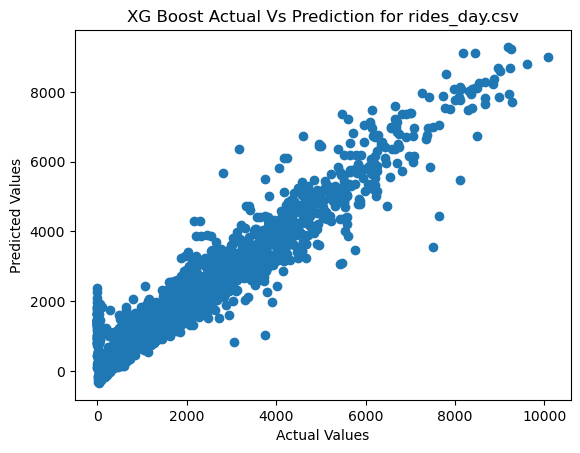

In [180]:
plt.scatter(Y_test,y_pred_xgb)
plt.title("XG Boost Actual Vs Prediction for rides_day.csv")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


Feature Importances:
Erhardt           0.399857
Margareten        0.206708
Average Temp      0.092042
Sunshine_Hours    0.062506
Kreuther          0.039080
Olympia           0.037463
Sunday            0.030110
Saturday          0.028206
Hirsch            0.024010
Precipitation     0.018959
Year              0.014427
Month             0.013259
Wednesday         0.007300
Thursday          0.006992
Tuesday           0.006823
Day               0.005693
Monday            0.004406
Cloud_Coverage    0.002158
dtype: float32


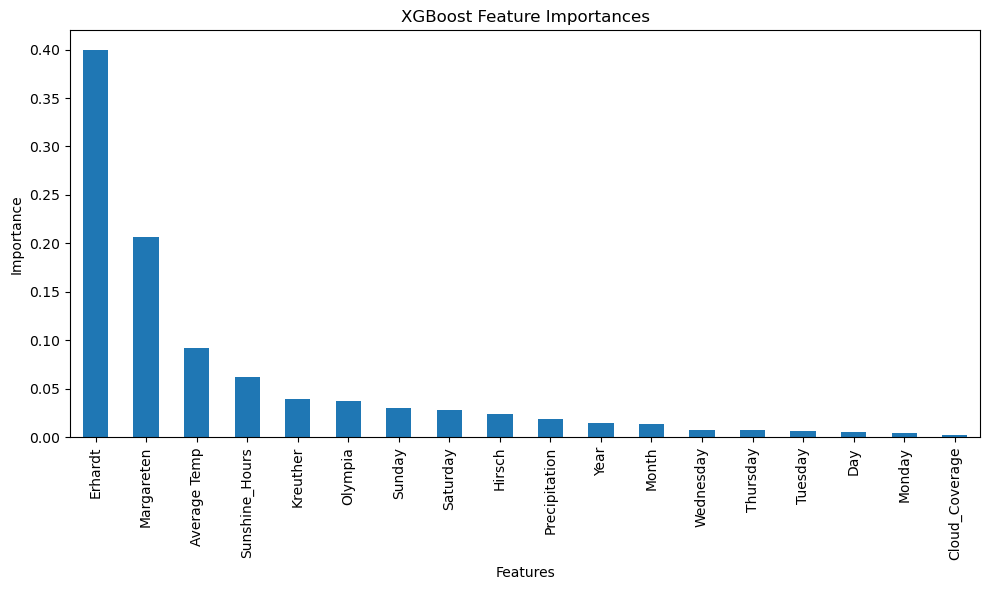

In [181]:
print("\nFeature Importances:")

feature_importances = model.feature_importances_


feature_importance_series = pd.Series(feature_importances, index=x.columns)


sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print(sorted_feature_importances)


plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title("XGBoost Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

### Training ML Model & Evaluation - XG BOOST Model for Rides 15min

In [182]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


model1 = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=100,          
                         learning_rate=0.1,         
                         max_depth=5,               
                         random_state=42)           


model1.fit(X1_train, Y1_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [183]:
# Model Prediction for Rides 15min

y1_pred_xgb = model1.predict(X1_test)


In [184]:
# Model Evaluation for Rides 15min

mse_xgb2 = mean_squared_error(Y1_test, y1_pred_xgb)

r2_xgb2 = r2_score(Y1_test, y1_pred_xgb)

print(f"\nXGBoost Model Evaluation for Rides 15min:")
print(f"Mean Squared Error (MSE): {mse_xgb2:.2f}")
print(f"R-squared (R2) Score: {r2_xgb2:.2f}")

print("\nFirst 10 actual vs XGBoost predicted values for Rides 15min:")
for i in range(10):
    print(f"Actual: {Y1_test.iloc[i]:.2f}, Predicted: {y1_pred_xgb[i]:.2f}")


XGBoost Model Evaluation for Rides 15min:
Mean Squared Error (MSE): 238.17
R-squared (R2) Score: 0.75

First 10 actual vs XGBoost predicted values for Rides 15min:
Actual: 6.00, Predicted: 6.40
Actual: 3.00, Predicted: 5.63
Actual: 61.00, Predicted: 46.32
Actual: 11.00, Predicted: 22.90
Actual: 5.00, Predicted: 8.72
Actual: 19.00, Predicted: 63.44
Actual: 22.00, Predicted: 31.01
Actual: 0.00, Predicted: 0.13
Actual: 2.00, Predicted: 6.78
Actual: 15.00, Predicted: 11.77


In [185]:
print("Train R²:", r2_score(Y1_train, model1.predict(X1_train)))
print("Test R²:", r2_score(Y1_test, model1.predict(X1_test)))

Train R²: 0.7523343563079834
Test R²: 0.7470842599868774


### Visualize Model Prediction for Rides 15min

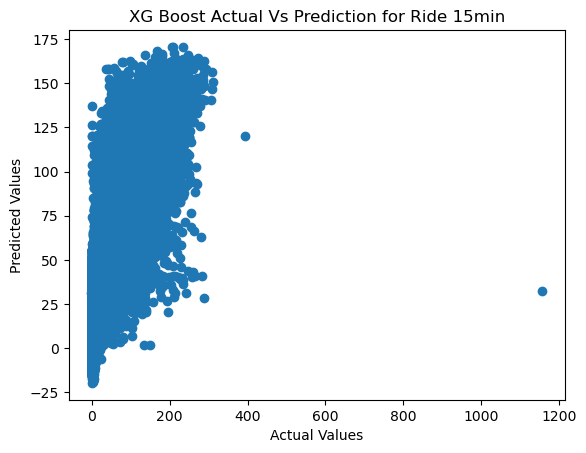

In [186]:
plt.scatter(Y1_test,y1_pred_xgb)
plt.title("XG Boost Actual Vs Prediction for Ride 15min")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


Feature Importances:
Erhardt             0.399857
Margareten          0.206708
Ending Minutes      0.092042
Year                0.062506
Kreuther            0.039080
Olympia             0.037463
Sunday              0.030110
Saturday            0.028206
Hirsch              0.024010
Day                 0.018959
Ending Hour         0.014427
Starting Minutes    0.013259
Wednesday           0.007300
Thursday            0.006992
Tuesday             0.006823
Starting Hour       0.005693
Monday              0.004406
Month               0.002158
dtype: float32


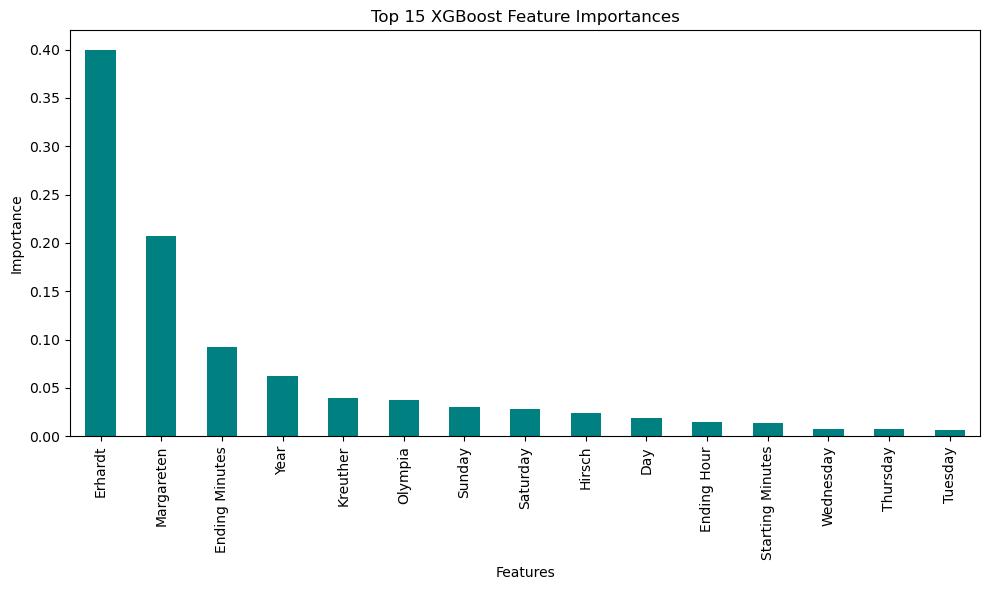

In [188]:
# Feature importance extraction
print("\nFeature Importances:")


# Use original column names from x1
feature_importance_series = pd.Series(feature_importances, index=x1.columns)



# Sort by importance
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print
print(sorted_feature_importances)

# Plot
plt.figure(figsize=(10, 6))
sorted_feature_importances.head(15).plot(kind='bar', color='teal')
plt.title("Top 15 XGBoost Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


### Save the Rides Day Model

In [189]:
import pickle
import os

dir=r"C:\Users\abdul\OneDrive\Desktop\LPDG ASSIGNMENT  BIKE FORECASTING\models"
model_file_name="xgboost_regressor_rides_day_v2.pkl"
model_file_path=os.path.join(dir,model_file_name)

pickle.dump(model,open(model_file_path, "wb"))

### Save the Rides 15min Model

In [199]:
import pickle
import os

dir=r"C:\Users\abdul\OneDrive\Desktop\LPDG ASSIGNMENT  BIKE FORECASTING\models"
model_file_name="xgboost_regressor_rides_15min_v2.pkl"
model_file_path=os.path.join(dir,model_file_name)

pickle.dump(model1,open(model_file_path, "wb"))

### Random Cell

In [197]:
X_test[0, :]

array([-0.36943897, -0.21939061,  0.83511917, -1.10936952,  0.13166802,
       -0.2877561 ,  1.75567141, -0.40788589,  2.48165495, -0.40613987,
       -0.40994523, -0.41136836, -0.40725135, -0.44680527, -0.45108653,
        2.24813618, -0.44818286, -0.44634576])

In [193]:
Y_test

5499      309
5166      160
4760      699
4310      899
11273    1165
         ... 
5609     3948
1194     2454
11844     638
12658    4388
1514      415
Name: Total_Rides_Day, Length: 2630, dtype: int64

In [195]:
X1_test[0, :]


array([ 1.28019918,  1.29460996, -0.29293451,  1.22855458,  1.34210039,
        1.37299526, -1.34197508, -0.4079728 , -0.40833789, -0.40758431,
       -0.40860996, -0.40821842,  2.44772904, -0.44868663,  2.22941904,
       -0.44805255, -0.44872185, -0.44870744])

In [196]:
Y1_test

604810      6
109406      3
987754     61
1189754    11
1098754     5
           ..
721609     38
514599      1
28293       0
882187     11
766552     38
Name: Total_Rides_15min, Length: 251154, dtype: int64